In [19]:
# imports
# This code will generate models to use with sedona and tardis
# Theoretical models are from https://hesma.h-its.org/doku.php
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%config InlineBackend.figure_formats = 'retina'


In [16]:
class model_density:
    
    def __init__(self, file_name):
        
        '''
        file_name : Density file from HESMA database.
        2 columns: first column gives the velocity in km/s (specified at the centre of a radial shell), 
        second column gives density in g/cm^3. For models that leave a bound remnant, 
        the profile extends only over the ejecta. The density is computed as a spherical average over the 
        hydrodynamics data; thus, it is a good description for the density at the corresponding radius. 
        It may, however, be slightly inconsistent when integrating to obtain a mass.
        '''
        
        column_names = ['velocity', 'density']        # km/sec, gm/cm^3
        self.density_df = pd.read_csv(file_name, sep='\s+', names=column_names, engine='python', 
                                      comment='#', skiprows=1)
            
            
    def plot_params(self, ax, ml_x, mil_x, ml_y, mil_y, invert=False):
    
        '''
        Remarks: Plotting parameters
        ax: axis object
        ml_x: major locator 'x'
        mil_x: minor locator 'x'
        ml_y: major locator 'y'
        mil_y: minor locator 'y'
        invert: Bool for the y-axis to be inverted 
    
        '''
    
        if invert:
            ax.invert_yaxis()
        
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 12, width = 2.0, labelsize = 12)
        ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 6, width = 1.2, labelsize = 12)
        ax.xaxis.set_major_locator(MultipleLocator(ml_x))
        ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
        ax.yaxis.set_major_locator(MultipleLocator(ml_y))
        ax.yaxis.set_minor_locator(MultipleLocator(mil_y))
        
        
    def homologous_expansion(self, rho_ref, t_ref, t_exp):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    

    def uniform_density(self, rho_ref, t_ref, t_exp):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    
    
    def power_law(self, rho_0, t_ref, t_exp, v, v0, n=-2):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        v: velocity in km/s.
        v0: scale velocity in km/s.
        
        returns: rho
        '''
        
        rho_ref = rho_0 * (v / v0)**n
        
        rho = rho_ref * (t_ref / t_exp)**3
        
        return rho
    
    
    def exponential(self, rho_0, t_ref, t_exp, v, v0):
        
        '''
        rho_ref : rho(v) at time explosion time t0.
        t_ref: reference explosion epoch in days.
        t_exp: time since explosion when density is being calculated in days.
        
        returns: rho
        '''
        
        rho_ref = rho_0 * np.exp(- v / v0)
        
        rho = rho_ref * (t_ref / t)**3
        
        return rho
    
    
    def plot_model_density(self, model_name, log_axis=True):
        
        
        '''
        model_name: name of the model whose density profile is being plotted.
        
        '''
        
        fig_app = plt.figure(figsize = (5, 5), facecolor='white')
        ax = fig_app.add_subplot(111)
        plt.rcParams['axes.linewidth'] = 3
        self.plot_params(ax, ml_x = 5000, mil_x = 1000, ml_y = 1, mil_y = 0.1, invert=False)
        legend_properties = {'size':15, 'weight':'book'}
        ax.plot(self.density_df['velocity'], self.density_df['density'], 'r--', label=model_name)
        if log_axis:
            ax.set_yscale("log")
    
        ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
        ax.set_ylabel(r'$\rm Density\ [g/cm^{3}]$', fontsize=20)
        ax.legend(fontsize=12, borderaxespad=3)
        ax.set_title("Density vs Velocity", fontsize=20)

In [5]:
file_path = '/Users/anirbandutta/Downloads/merger_2012_11+09/'
density_file = file_path + 'merger_2012_11_09_density.dat' 

In [17]:
density = model_density(density_file)

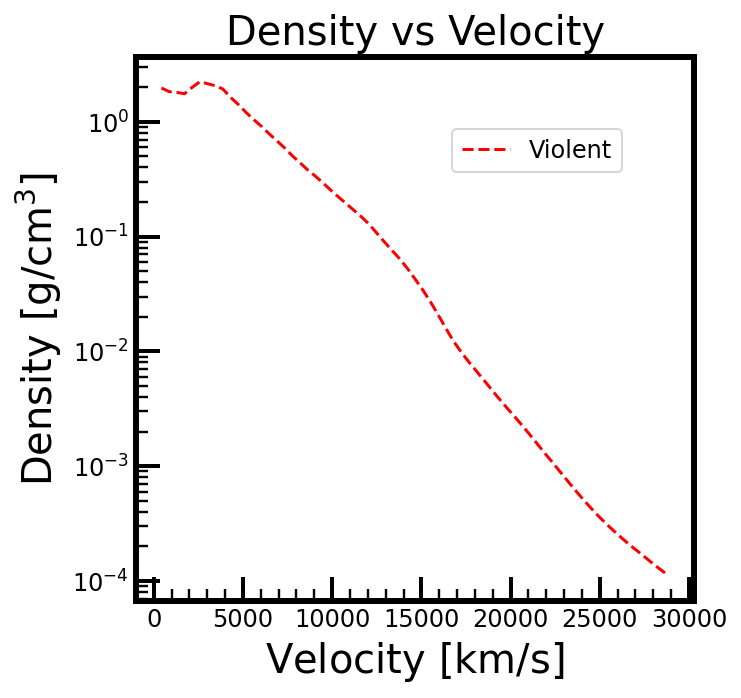

In [20]:
density.plot_model_density(model_name='Violent')